## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [4]:
filename

'features_PEG_P2_S1_XY01'

In [61]:
features = []
remote_folder = 'Tissue_Studies/09_11_18_Regional'
bucket = 'ccurtis.data'

vids = 15
types = ['PEG', 'PS']
pups = [2, 3]
slices = [1, 2, 3]
counter = 0
for typ in types:
    for pup in pups:
        for slic in slices:
            for num in range(1, vids+1):
                #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                #to_track.append('{}_P{}_S{}_XY{}'.format(typ, pup, slic, '%02d' % num))
                filename = 'features_{}_P{}_S{}_XY{}.csv'.format(typ, pup, slic, '%02d' % num)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                fstats['Slices'] = pd.Series(fstats.shape[0]*[str(slic)], index=fstats.index)
                fstats['Pup'] = pd.Series(fstats.shape[0]*[str(pup)], index=fstats.index)
                if num in range(1, 6):
                    fstats['Region'] = pd.Series(fstats.shape[0]*['Cortex'], index=fstats.index)
                    fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Cortex'.format(typ)], index=fstats.index)
                elif num in range(6, 11):
                    fstats['Region'] = pd.Series(fstats.shape[0]*['Hippocampus'], index=fstats.index)
                    fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Hippocampus'.format(typ)], index=fstats.index)
                else:
                    fstats['Region'] = pd.Series(fstats.shape[0]*['Thalamus'], index=fstats.index)
                    fstats['Region and Type'] = pd.Series(fstats.shape[0]*['{}_Thalamus'.format(typ)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)

features_PEG_P2_S1_XY01.csv
features_PEG_P2_S1_XY02.csv
features_PEG_P2_S1_XY03.csv
features_PEG_P2_S1_XY04.csv
features_PEG_P2_S1_XY05.csv
features_PEG_P2_S1_XY06.csv
features_PEG_P2_S1_XY07.csv
features_PEG_P2_S1_XY08.csv
features_PEG_P2_S1_XY09.csv
features_PEG_P2_S1_XY10.csv
features_PEG_P2_S1_XY11.csv
features_PEG_P2_S1_XY12.csv
features_PEG_P2_S1_XY13.csv
features_PEG_P2_S1_XY14.csv
features_PEG_P2_S1_XY15.csv
features_PEG_P2_S2_XY01.csv
features_PEG_P2_S2_XY02.csv
features_PEG_P2_S2_XY03.csv
features_PEG_P2_S2_XY04.csv
features_PEG_P2_S2_XY05.csv
features_PEG_P2_S2_XY06.csv
features_PEG_P2_S2_XY07.csv
features_PEG_P2_S2_XY08.csv
features_PEG_P2_S2_XY09.csv
features_PEG_P2_S2_XY10.csv
features_PEG_P2_S2_XY11.csv
features_PEG_P2_S2_XY12.csv
features_PEG_P2_S2_XY13.csv
features_PEG_P2_S2_XY14.csv
features_PEG_P2_S2_XY15.csv
features_PEG_P2_S3_XY01.csv
features_PEG_P2_S3_XY02.csv
features_PEG_P2_S3_XY03.csv
features_PEG_P2_S3_XY04.csv
features_PEG_P2_S3_XY05.csv
features_PEG_P2_S3_X

In [62]:
fstats_tot.to_csv('features.csv')

In [63]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Particle Type', 'Video Number', 'Track_ID', 'Slices', 'Pup', 'Region', 'Region and Type']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [64]:
fstats_tot[fstats_tot['Video Number']==1]

,AR,D_fit,Deff1,Deff2,MSD_ratio,Mean_Intensity,Quality,SN_Ratio,Track_ID,X,...,frames,kurtosis,straightness,trappedness,Particle Type,Video Number,Slices,Pup,Region,Region and Type
0,2.565461,6.809109e-01,2.714373,1.442466,0.004743,316.472029,35.865891,1.173713,0.0,247.661812,...,314.0,2.193261,0.057543,-0.226516,PEG,1,1,2,Cortex,PEG_Cortex
1,2.348084,7.181399e-06,0.008485,0.001362,0.079505,302.749838,47.491731,0.682805,1.0,376.581431,...,651.0,2.558596,0.008457,-0.219557,PEG,1,1,2,Cortex,PEG_Cortex
2,2.529632,3.190556e+01,2.372665,1.896592,0.007528,239.607134,22.778258,0.871256,2.0,295.995378,...,651.0,1.634418,0.023750,-0.226541,PEG,1,1,2,Cortex,PEG_Cortex
3,1.376372,5.486250e+01,7.346238,NaN,0.086369,195.454988,5.269293,0.843252,3.0,211.172710,...,67.0,2.970006,0.079887,-0.220453,PEG,1,1,2,Cortex,PEG_Cortex
4,1.413471,1.216558e-01,3.149555,2.023651,0.017948,260.051434,29.828593,0.805139,4.0,62.227725,...,124.0,2.205559,0.080932,-0.221012,PEG,1,1,2,Cortex,PEG_Cortex
5,1.459111,2.873233e+00,1.888869,0.498785,0.035144,216.446207,14.606603,0.858277,5.0,216.545059,...,456.0,2.477487,0.019414,-0.222323,PEG,1,1,2,Cortex,PEG_Cortex
6,1.374022,3.015226e+01,4.266367,NaN,1.376533,182.029317,2.504178,0.485393,6.0,340.083526,...,48.0,1.657694,0.027332,-0.200412,PEG,1,1,2,Cortex,PEG_Cortex
7,1.930505,4.712200e+00,1.775091,NaN,0.044725,218.235210,9.810111,1.317125,7.0,396.115071,...,54.0,2.279785,0.096747,-0.219215,PEG,1,1,2,Cortex,PEG_Cortex
8,1.103888,3.550239e+01,6.438442,NaN,43.235227,188.536923,8.128532,0.956370,8.0,160.025355,...,50.0,2.272223,0.032337,-0.215802,PEG,1,1,2,Cortex,PEG_Cortex
9,1.669726,2.937901e-01,1.977210,1.575549,0.021192,177.763178,3.292327,0.548033,9.0,397.722349,...,117.0,3.617938,0.068204,-0.219937,PEG,1,1,2,Cortex,PEG_Cortex


## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [65]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=8)

Cumulative explained variance:
0 component: 0.23135369007978926
1 component: 0.395611599867323
2 component: 0.49731737490853595
3 component: 0.5770643798066506
4 component: 0.6457602588145751
5 component: 0.6964580442232484
6 component: 0.7468444159163916
7 component: 0.7927519621087669


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [66]:
kmostat = pca.kmo(pcadataset.scaled)

0.868210250963


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [67]:
import numpy as np
ncomp = 8
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Cortex'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PEG_Thalamus'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Cortex'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Hippocampus'].values[:, -ncomp:], axis=0)
dicti[5] = np.nanmean(pcadataset.final[pcadataset.final['Region and Type']=='PS_Thalamus'].values[:, -ncomp:], axis=0)

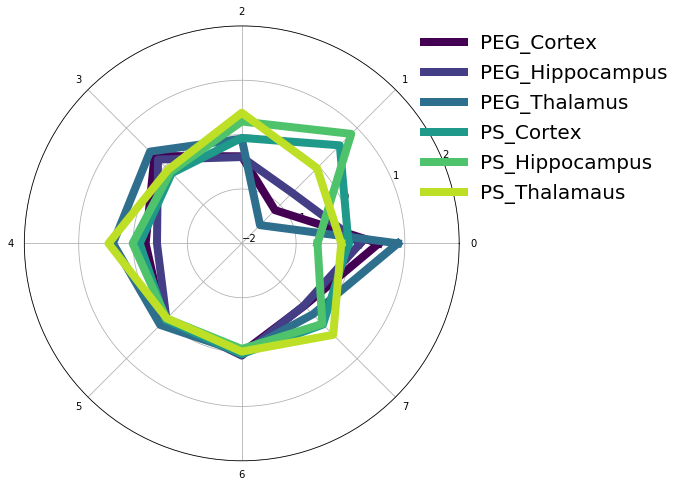

In [68]:
pca.plot_pca(dicti, savefig=True, labels=['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus',
                                          'PS_Thalamaus'])

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [ ]:
pcadataset.prcomps

In [ ]:
import numpy as np
dicti = {}
dicti[0] = np.nanstd(pcadataset.final[pcadataset.final['Percent Agarose']==0.4].as_matrix(), axis=0)[-ncomp:]
dicti[1] = np.nanstd(pcadataset.final[pcadataset.final['Percent Agarose']==1.2].as_matrix(), axis=0)[-ncomp:]

In [ ]:
pca.plot_pca(dicti, savefig=True, labels=['0.4%', '1.2%'], rticks=np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5]))

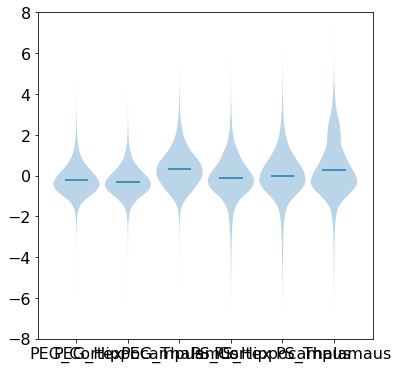

In [14]:
import diff_classifier.features as ft
tgroups = {}
tgroups[0] = pcadataset.final[pcadataset.final['Region and Type']=='PEG_Cortex']
tgroups[1] = pcadataset.final[pcadataset.final['Region and Type']=='PEG_Hippocampus']
tgroups[2] = pcadataset.final[pcadataset.final['Region and Type']=='PEG_Thalamus']
tgroups[3] = pcadataset.final[pcadataset.final['Region and Type']=='PS_Cortex']
tgroups[4] = pcadataset.final[pcadataset.final['Region and Type']=='PS_Hippocampus']
tgroups[5] = pcadataset.final[pcadataset.final['Region and Type']=='PS_Thalamus']
ft.feature_violin(tgroups, points=160, feature=4, ylim=[-8, 8], labels=['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus',
                  'PS_Thalamaus'], nticks=9)

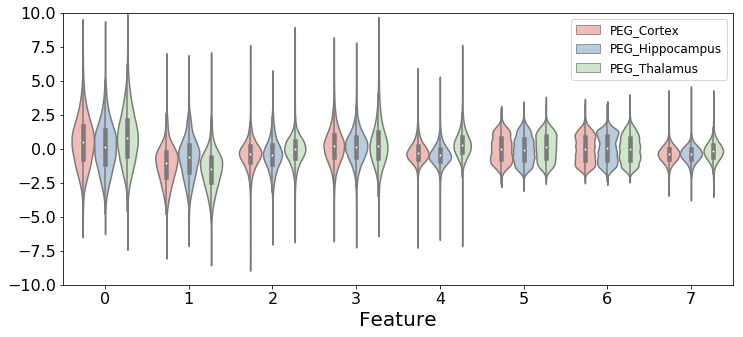

In [69]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=8, yrange=[-10, 10])

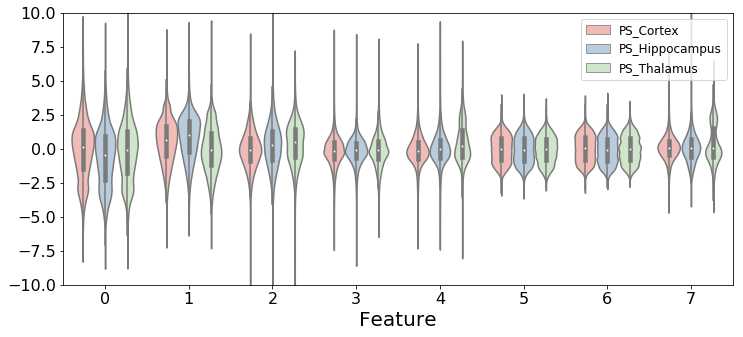

In [73]:
lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
feats = pca.feature_violin(pcadataset.final, label='Region and Type', lvals=lvals, fsubset=8, yrange=[-10, 10])

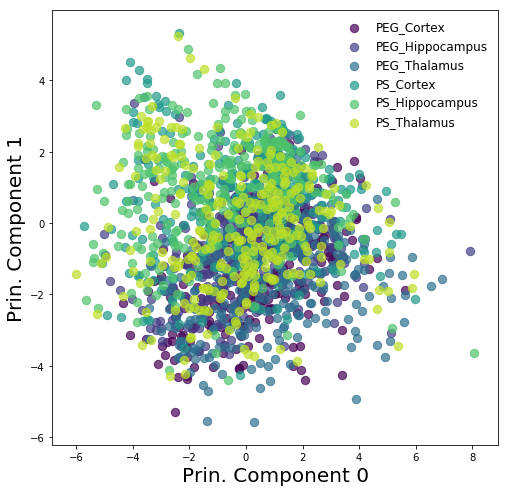

In [72]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_2D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4])

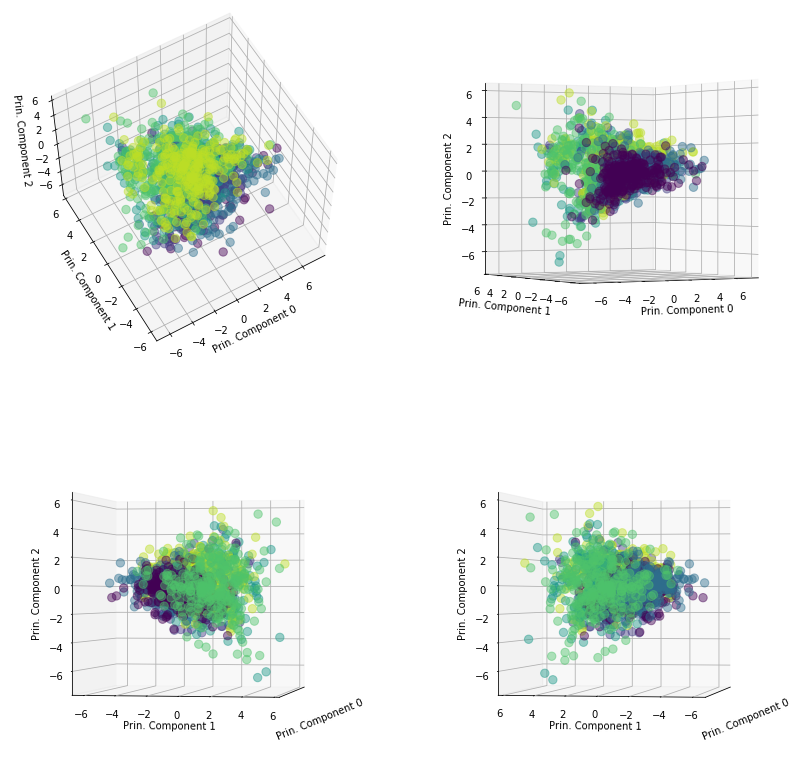

In [75]:
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region and Type', lvals=lvals, randcount=300, yrange=[-6, 6],
                              xrange=[-4, 4], alpha=0.45)

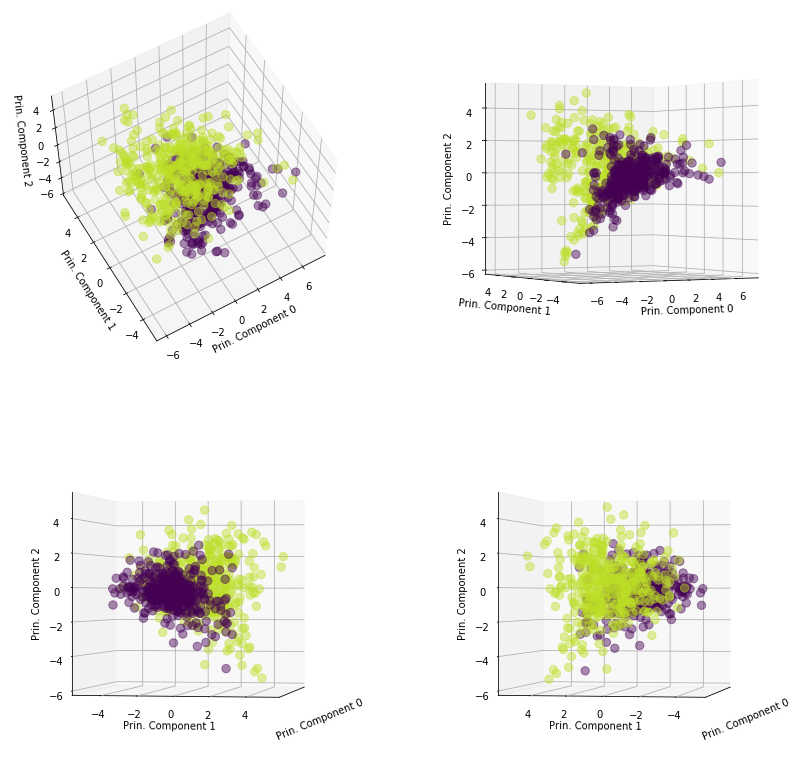

In [48]:
lvals = ['PEG', 'PS']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Particle Type', lvals=lvals, randcount=400, yrange=[-6, 6],
                              xrange=[-4, 4], alpha=0.45)

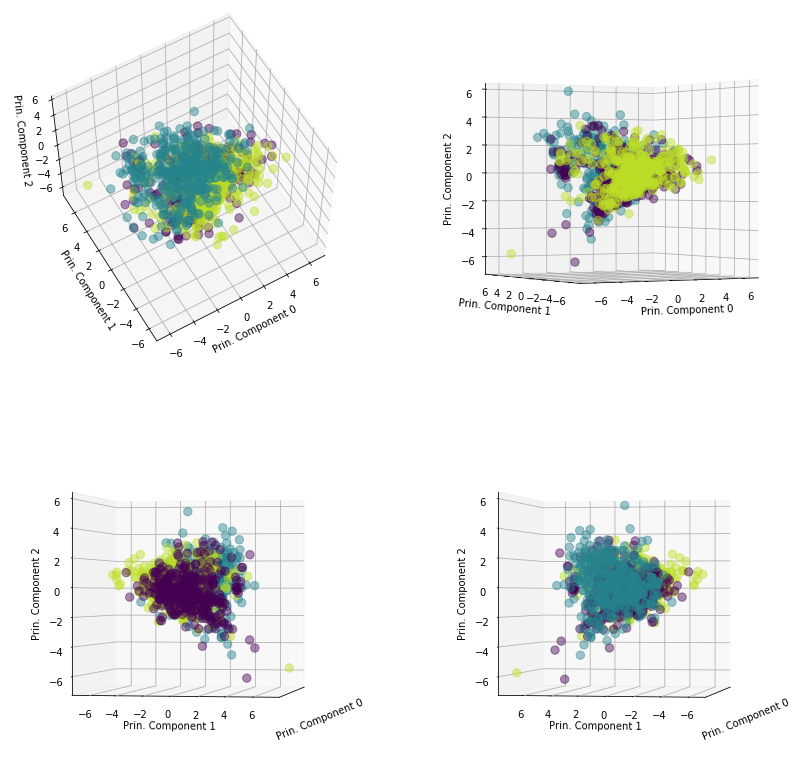

In [74]:
lvals = ['Cortex', 'Hippocampus', 'Thalamus']
#lvals = ['PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']
fstats1 = pca.feature_plot_3D(pcadataset.final,
                              label='Region', lvals=lvals, randcount=400, yrange=[-6, 6],
                              xrange=[-4, 4], alpha=0.45)

In [76]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['PEG_Cortex', 'PEG_Hippocampus', 'PEG_Thalamus', 'PS_Cortex', 'PS_Hippocampus', 'PS_Thalamus']

for i in range(0, 30):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Region and Type', lvals, equal_sampling=True,
                                       tsize=400, n_neighbors=6, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region and Type'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))

In [77]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.5427361111111111 +/ 0.008413973258078153
0.3644518003897765 +/ 0.00315682218870394


In [78]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['PEG', 'PS']

for i in range(0, 30):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Particle Type', lvals, equal_sampling=True,
                                       tsize=400, n_neighbors=6, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Particle Type'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))

In [79]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.8390833333333333 +/ 0.008891319112232761
0.7567715021815253 +/ 0.006406025351712496


In [80]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 30):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Region', lvals, equal_sampling=True,
                                       tsize=400, n_neighbors=6, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))

In [81]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6266944444444444 +/ 0.016488609049736796
0.4693794684044423 +/ 0.00473894344029041


In [82]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 30):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final[pcadataset.final['Particle Type']=='PEG'],
                                       'Region', lvals, equal_sampling=True,
                                       tsize=400, n_neighbors=6, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))

In [83]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6210833333333333 +/ 0.011287796589762407
0.43967158805997125 +/ 0.007779280784128044


In [84]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])
lvals = ['Cortex', 'Hippocampus', 'Thalamus']

for i in range(0, 30):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final[pcadataset.final['Particle Type']=='PS'],
                                       'Region', lvals, equal_sampling=True,
                                       tsize=400, n_neighbors=6, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Region'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))

In [85]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.6325277777777778 +/ 0.015145105757143512
0.4386798648278577 +/ 0.006539781531720532
